In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
festivales_bcn_18 = pd.read_pickle("./data/festivales_bcn_18_procesado.pkl")

In [3]:
categoricas_festivales = [
    "Ambit",
    "Titularidad",
    "Mes",
    "Estacion"
]

In [4]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion'
]

In [5]:
columnas_numericas_fests = [
    "Edicio",
    "Assistents_a_Barcelona",
    "Assistents_fora_de_Barcelona",
    "total_asist"
]

Funciones análisis

In [6]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [7]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [8]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [9]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [10]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [11]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [12]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

Tendencia central

In [13]:
festivales_bcn_18.describe().loc["mean"]

Edicio                              20.5
Assistents_a_Barcelona          156972.0
Assistents_fora_de_Barcelona         0.0
total_asist                     156972.0
Name: mean, dtype: float64

In [14]:
festivales_bcn_18.describe().loc["50%"]

Edicio                              13.5
Assistents_a_Barcelona          139500.0
Assistents_fora_de_Barcelona         0.0
total_asist                     139500.0
Name: 50%, dtype: float64

In [15]:
festivales_bcn_18.describe().loc["max"]

Edicio                              50.0
Assistents_a_Barcelona          290522.0
Assistents_fora_de_Barcelona         0.0
total_asist                     290522.0
Name: max, dtype: float64

In [16]:
festivales_bcn_18.describe().loc["min"]

Edicio                              6.0
Assistents_a_Barcelona          59800.0
Assistents_fora_de_Barcelona        0.0
total_asist                     59800.0
Name: min, dtype: float64

In [17]:
festivales_bcn_18[categoricas_festivales].mode().T

,0
Ambit,Música
Titularidad,Privada
Mes,Junio
Estacion,Primavera


Comentarios <br>


Frecuencias relativa y absoluta

In [18]:
for catego in categoricas_destacadas:
    print(festivales_bcn_18[catego].value_counts())
    print("\n")

Ambit
Música                         5
Arts escèniques                2
Multidisciplinaris i altres    1
Name: count, dtype: int64


Titularidad
Privada    5
Pública    3
Name: count, dtype: int64


Mes
Junio         2
Marzo         1
Julio         1
Febrero       1
Septiembre    1
Mayo          1
Abril         1
Name: count, dtype: int64


Estacion
Primavera    4
Invierno     2
Verano       1
Otoño        1
Name: count, dtype: int64




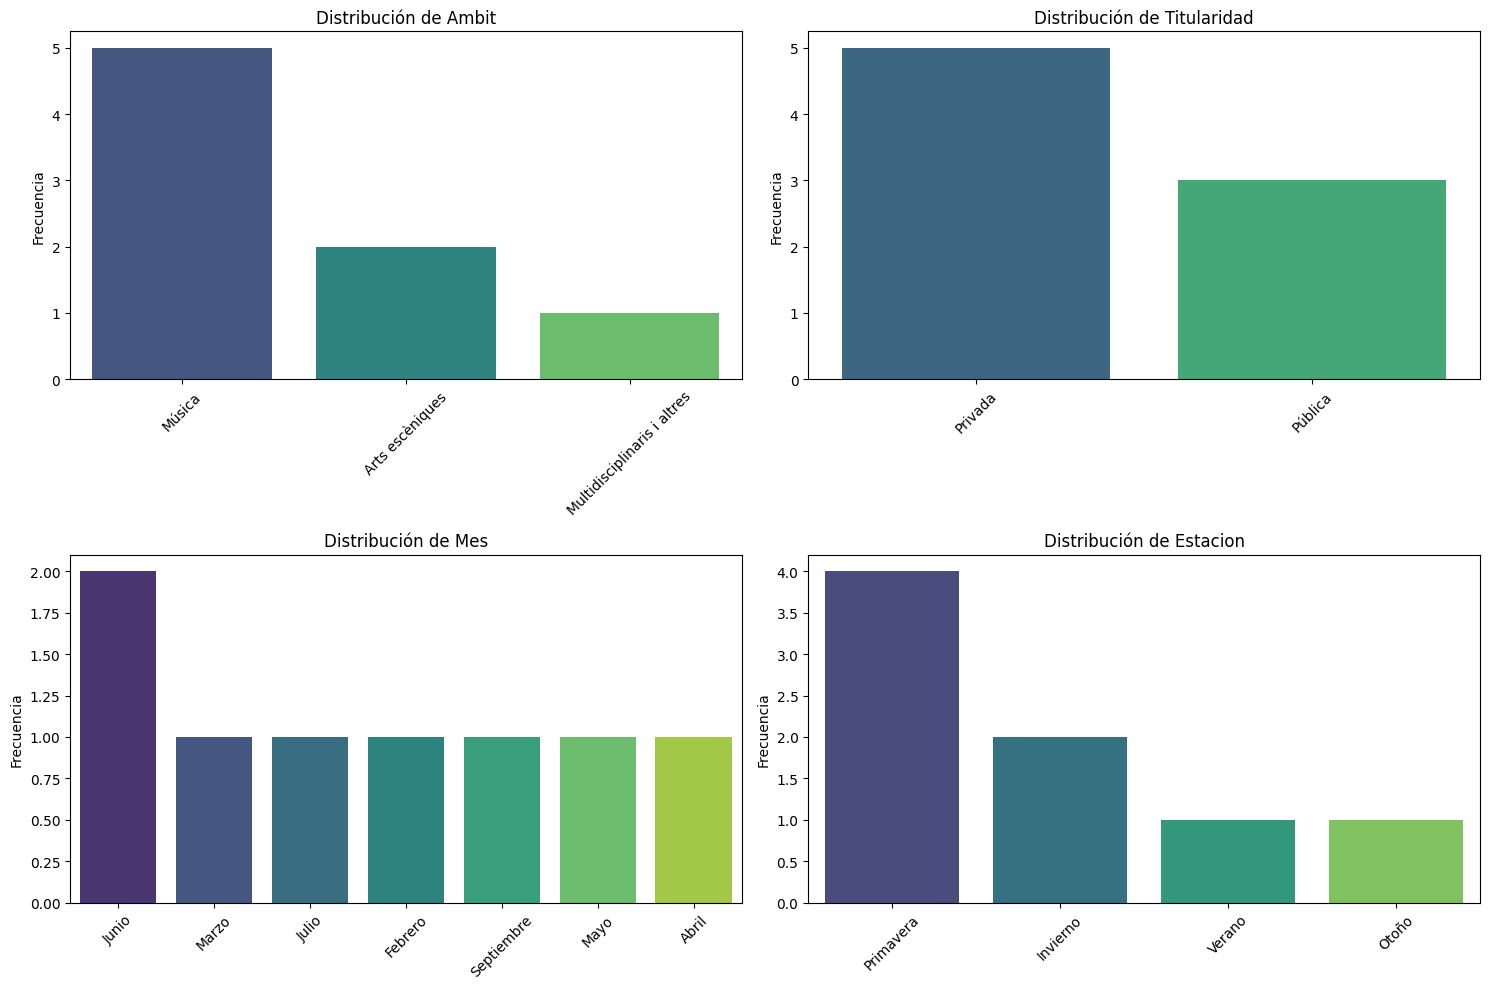

In [19]:
pinta_distribucion_categoricas(festivales_bcn_18, categoricas_destacadas)

Comentarios <br>


In [20]:
for catego in categoricas_destacadas:
    print(festivales_bcn_18[catego].value_counts()/len(festivales_bcn_18)*100)
    print("\n")

Ambit
Música                         62.5
Arts escèniques                25.0
Multidisciplinaris i altres    12.5
Name: count, dtype: float64


Titularidad
Privada    62.5
Pública    37.5
Name: count, dtype: float64


Mes
Junio         25.0
Marzo         12.5
Julio         12.5
Febrero       12.5
Septiembre    12.5
Mayo          12.5
Abril         12.5
Name: count, dtype: float64


Estacion
Primavera    50.0
Invierno     25.0
Verano       12.5
Otoño        12.5
Name: count, dtype: float64




Comentarios <br>


Medidas de posición

In [21]:
festivales_bcn_18.describe()

,Edicio,Assistents_a_Barcelona,Assistents_fora_de_Barcelona,total_asist
count,8.000000,8.000000,8.0,8.000000
mean,20.500000,156972.000000,0.0,156972.000000
std,17.179722,70925.912081,0.0,70925.912081
min,6.000000,59800.000000,0.0,59800.000000
25%,7.000000,122406.500000,0.0,122406.500000
50%,13.500000,139500.000000,0.0,139500.000000
75%,29.250000,182500.000000,0.0,182500.000000
max,50.000000,290522.000000,0.0,290522.000000


In [22]:
get_IQR(festivales_bcn_18,"Edicio") 
# No es tanto mayor que la mediana (11), y casi igual que la media (mean)

22.25

In [23]:
print(festivales_bcn_18["Edicio"].quantile(0.5), "\n",
    festivales_bcn_18["Edicio"].quantile(0.9), "\n",
    festivales_bcn_18["Edicio"].quantile(0.95), "\n",
    festivales_bcn_18["Edicio"].max())

13.5 
 44.4 
 47.199999999999996 
 50.0


Comentarios <br>


In [24]:
get_IQR(festivales_bcn_18,"total_asist") 
# Sí es mucho mayor que la mediana(2120). Hay mucha dispersión. Hay que tomar con cuidado la tendencia central

60093.5

In [25]:
print(festivales_bcn_18["total_asist"].quantile(0.5), "\n",
    festivales_bcn_18["total_asist"].quantile(0.9), "\n",
    festivales_bcn_18["total_asist"].quantile(0.95), "\n",
    festivales_bcn_18["total_asist"].max())

139500.0 
 241156.59999999998 
 265839.3 
 290522.0


Comentarios <br>


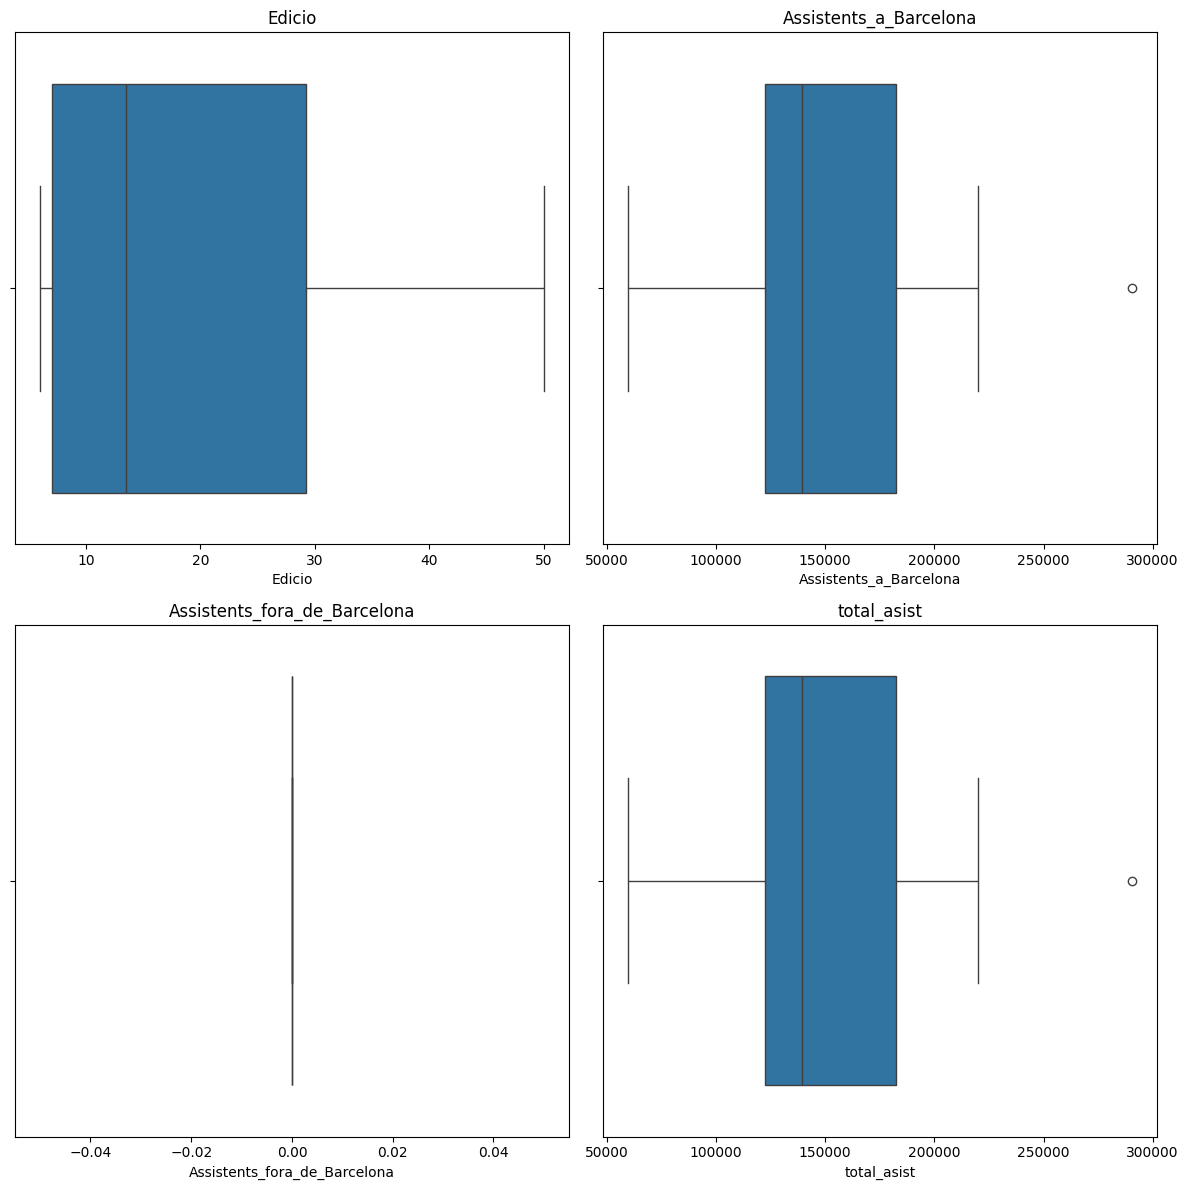

In [26]:
plot_multiple_boxplots(festivales_bcn_18, columnas_numericas_fests)

Comentarios <br>


In [27]:
plot_boxplot_grouped(festivales_bcn_18, "Edicio", "total_asist")

# Por qué no consigo que se imprima esto????

Medidas de dispersión

In [28]:
festivales_bcn_18.describe().loc[["std", "mean"]].T

,std,mean
Edicio,17.179722,20.5
Assistents_a_Barcelona,70925.912081,156972.0
Assistents_fora_de_Barcelona,0.000000,0.0
total_asist,70925.912081,156972.0


In [29]:
variabilidad(festivales_bcn_18)
# Menos 15% es baja variabilidad, entre 15 y 30 es normal, más de 30 es alta = Es decir, todos tienen una altísima variabilidad! A ver visualmente...

,std,mean,CV
Edicio,17.179722,20.5,0.838035
Assistents_a_Barcelona,70925.912081,156972.0,0.451838
Assistents_fora_de_Barcelona,0.000000,0.0,NaN
total_asist,70925.912081,156972.0,0.451838


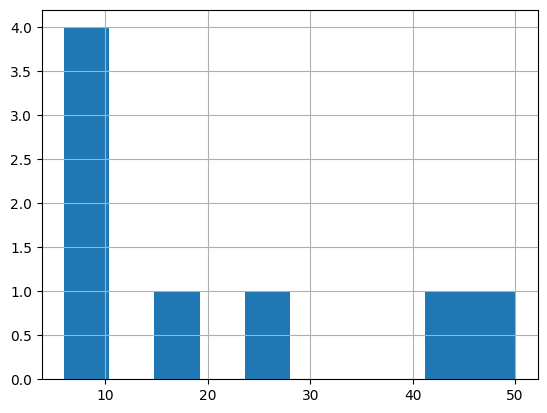

In [30]:
festivales_bcn_18["Edicio"].hist();

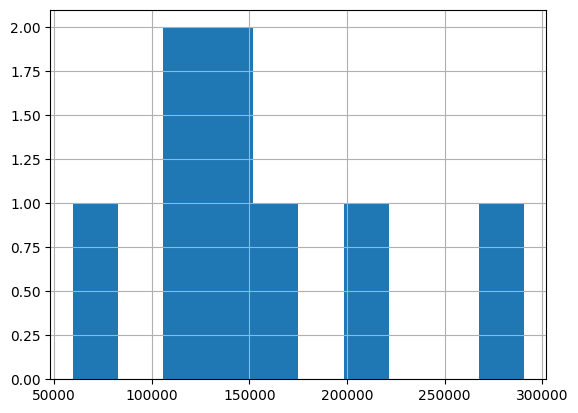

In [31]:
festivales_bcn_18["total_asist"].hist();

Comentarios <br>


Distribución

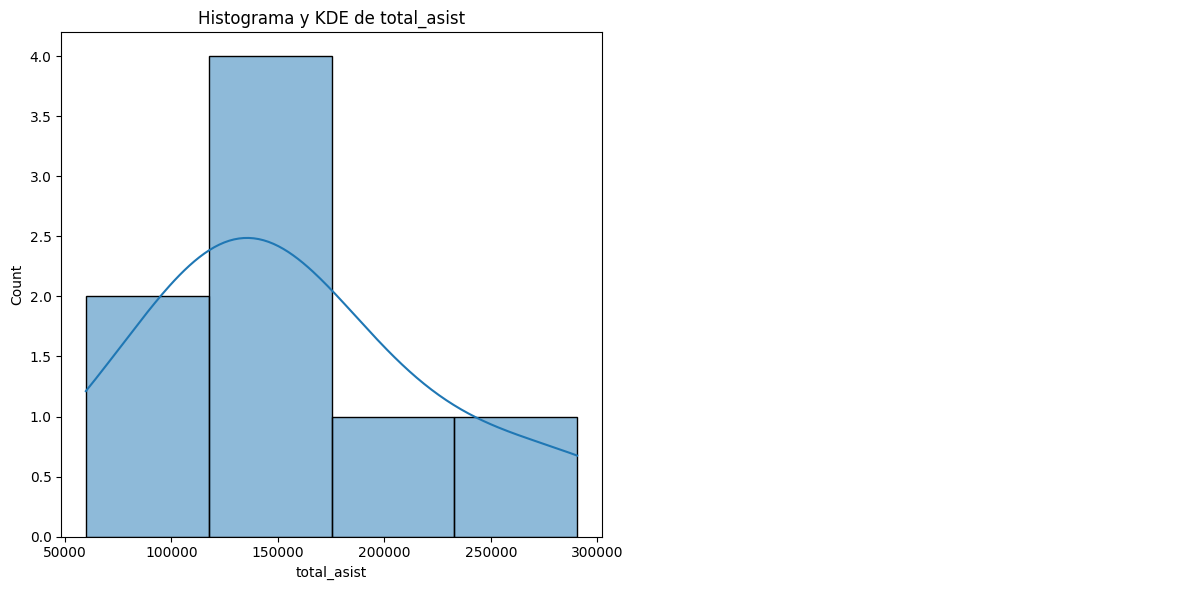

In [32]:
plot_histo_den(festivales_bcn_18, ["total_asist"])

Anomalías outliers

(2,)


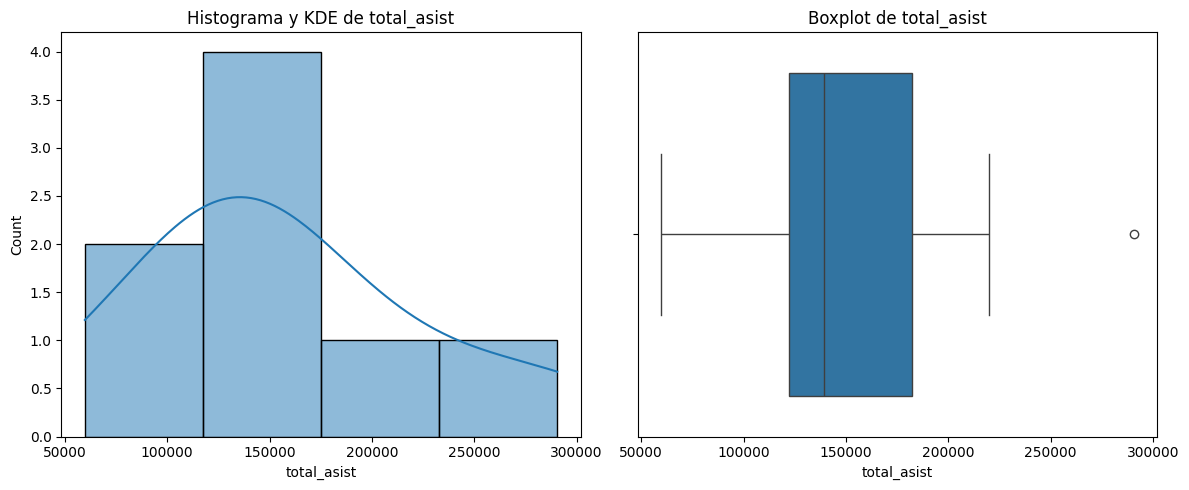

In [33]:
plot_combined_graphs(festivales_bcn_18, ["total_asist"])

In [34]:
festivales_bcn_18

,Ambit,Edicio,NomDelFestival,Assistents_a_Barcelona,Assistents_fora_de_Barcelona,Titularidad,Mes,Estacion,total_asist
1,Música,7.0,Brunch-in the City,135000.0,0.0,Privada,Marzo,Invierno,135000.0
2,Música,6.0,Festival Jardins de Pedralbes,59800.0,0.0,Privada,Junio,Primavera,59800.0
3,Arts escèniques,42.0,Grec Festival de Barcelona,109868.0,0.0,Pública,Julio,Verano,109868.0
4,Multidisciplinaris i altres,7.0,Llum BCN,170000.0,0.0,Pública,Febrero,Invierno,170000.0
5,Arts escèniques,9.0,Mercè Arts de Carrer. MAC,290522.0,0.0,Pública,Septiembre,Otoño,290522.0
6,Música,18.0,Primavera Sound,220000.0,0.0,Privada,Mayo,Primavera,220000.0
7,Música,25.0,Sónar. Festival Internacional de Música Avança...,126586.0,0.0,Privada,Junio,Primavera,126586.0
8,Música,50.0,Voll-Damm Festival de Jazz de Barcelona,144000.0,0.0,Privada,Abril,Primavera,144000.0
